In [1]:
import numpy as np
from pyquery import PyQuery as pq
from matplotlib import pylab as plt

%matplotlib inline
%config InlineBackend.figure_format = "svg"

In [2]:
def load_data(data_file: "html", ret_flag: int=0)->tuple:
    """
    Считывание данных из файла, удаление заголовков 
    и разбиение данных на дату и координаты
    """
    text = [item.text() for item in data_file.items("pre")]
    text = text[0].split()
    text = text[3:] # del table 
    del(text[2::3]) # del sigma from data
    
    date = np.array(text[0::2]).astype(float) # convert str to int
    
    data_value = np.array(text[1::2]).astype(float) # convert str value to float
    
    if ret_flag:
        return data_value, date
    return data_value

In [34]:
# x_data = pq(filename="x46.html")
# y_data = pq(filename="y46.html")
x_data = pq(filename="30x.html")
y_data = pq(filename="30y.html")


x_coord, date = load_data(x_data, 1)
y_coord = load_data(y_data)
# x_coord = x_coord[:y_coord.size]
# date = date[:y_coord.size]
print(x_coord.shape, y_coord.shape, date.shape)

(1720,) (1720,) (1720,)


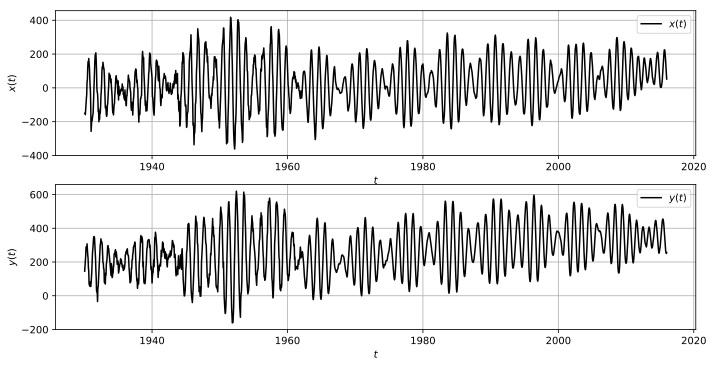

In [35]:
plt.figure(figsize=(11.5, 15.5))
plt.subplot(5,1,1)
plt.grid(True)
plt.ylabel("$x(t)$")
plt.xlabel("$t$")
plt.plot(date, x_coord, color="black", label="$x(t)$")
plt.legend()

plt.subplot(5,1,2)
plt.grid(True)
plt.ylabel("$y(t)$")
plt.xlabel("$t$")
plt.plot(date, y_coord, color="black", label="$y(t)$")
plt.legend()

# plt.savefig("./figures/x_and_y.eps", format="eps")
plt.show()

In [36]:
A_coord = np.vstack([date, np.ones(len(date))]).T
a_x, b_x = np.linalg.lstsq(A_coord, x_coord, rcond=None)[0]
a_y, b_y = np.linalg.lstsq(A_coord, y_coord, rcond=None)[0]
print("a_x = {}, b_x = {}".format(a_x, b_x))
print("a_y = {}, b_y = {}".format(a_y, b_y))
trend_x = a_x * date + b_x
trend_y = a_y * date + b_y
detrend_x = x_coord - trend_x
detrend_y = y_coord - trend_y

a_x = 0.9718842027905721, b_x = -1890.5919024309949
a_y = 1.9630123397979824, b_y = -3604.635989238856


In [37]:
def polar_coordinate_system(x: "np.array", y: "np.array"):
    r = np.sqrt(x ** 2 + y ** 2)
#     phi = [np.arctan(y[0] / x[0]) + np.pi]
    phi = [0]
    for i in range(len(r) - 1):
        delta_x = x[i + 1] - x[i]
        delta_y = y[i + 1] - y[i]
        delta_r = np.sqrt(delta_x ** 2 + delta_y ** 2)
        
        delta_phi = np.arccos(np.minimum(1,(r[i + 1] ** 2 + r[i] ** 2 - delta_r ** 2)/
                              (2 * r[i + 1] * r[i])))
        k = (x[i] * (y[i] - y[i - 1]) - y[i] * (x[i] - x[i - 1]))
        if k == 0 :
            print(k)
            phi.append(phi[i] + delta_phi * k)
        else:
            k /= np.abs(k)
            phi.append(phi[i] + delta_phi * k)

    return r, phi

In [38]:
r, phi = polar_coordinate_system(detrend_x, detrend_y)

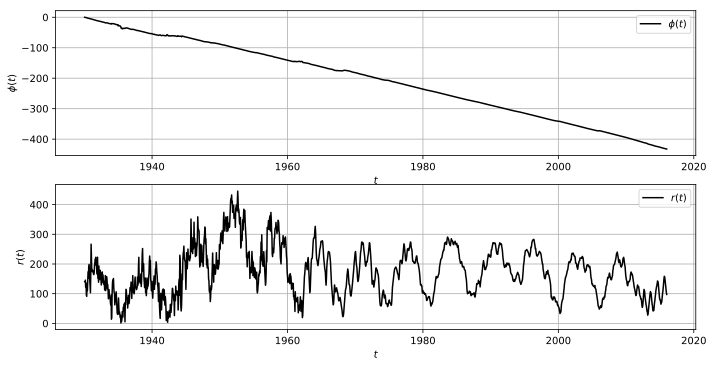

In [39]:
plt.figure(figsize=(11.5, 15.5))
plt.subplot(5,1,1)
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(date, phi, color="black", label="$\phi(t)$")
plt.legend()

plt.subplot(5,1,2)
plt.grid(True)
plt.ylabel("$r(t)$")
plt.xlabel("$t$")
plt.plot(date, r, color="black", label="$r(t)$")
plt.legend()
# plt.savefig("./figures/polar.eps", format="eps")
plt.show()

In [40]:
A = np.vstack([date, np.ones(len(date))]).T
a, b = np.linalg.lstsq(A, phi, rcond=None)[0]
print("a = {}, b = {}".format(a, b))
trend = a * date + b

a = -4.944061054007044, b = 9548.11251064844


In [41]:
detrend_phi = phi - trend

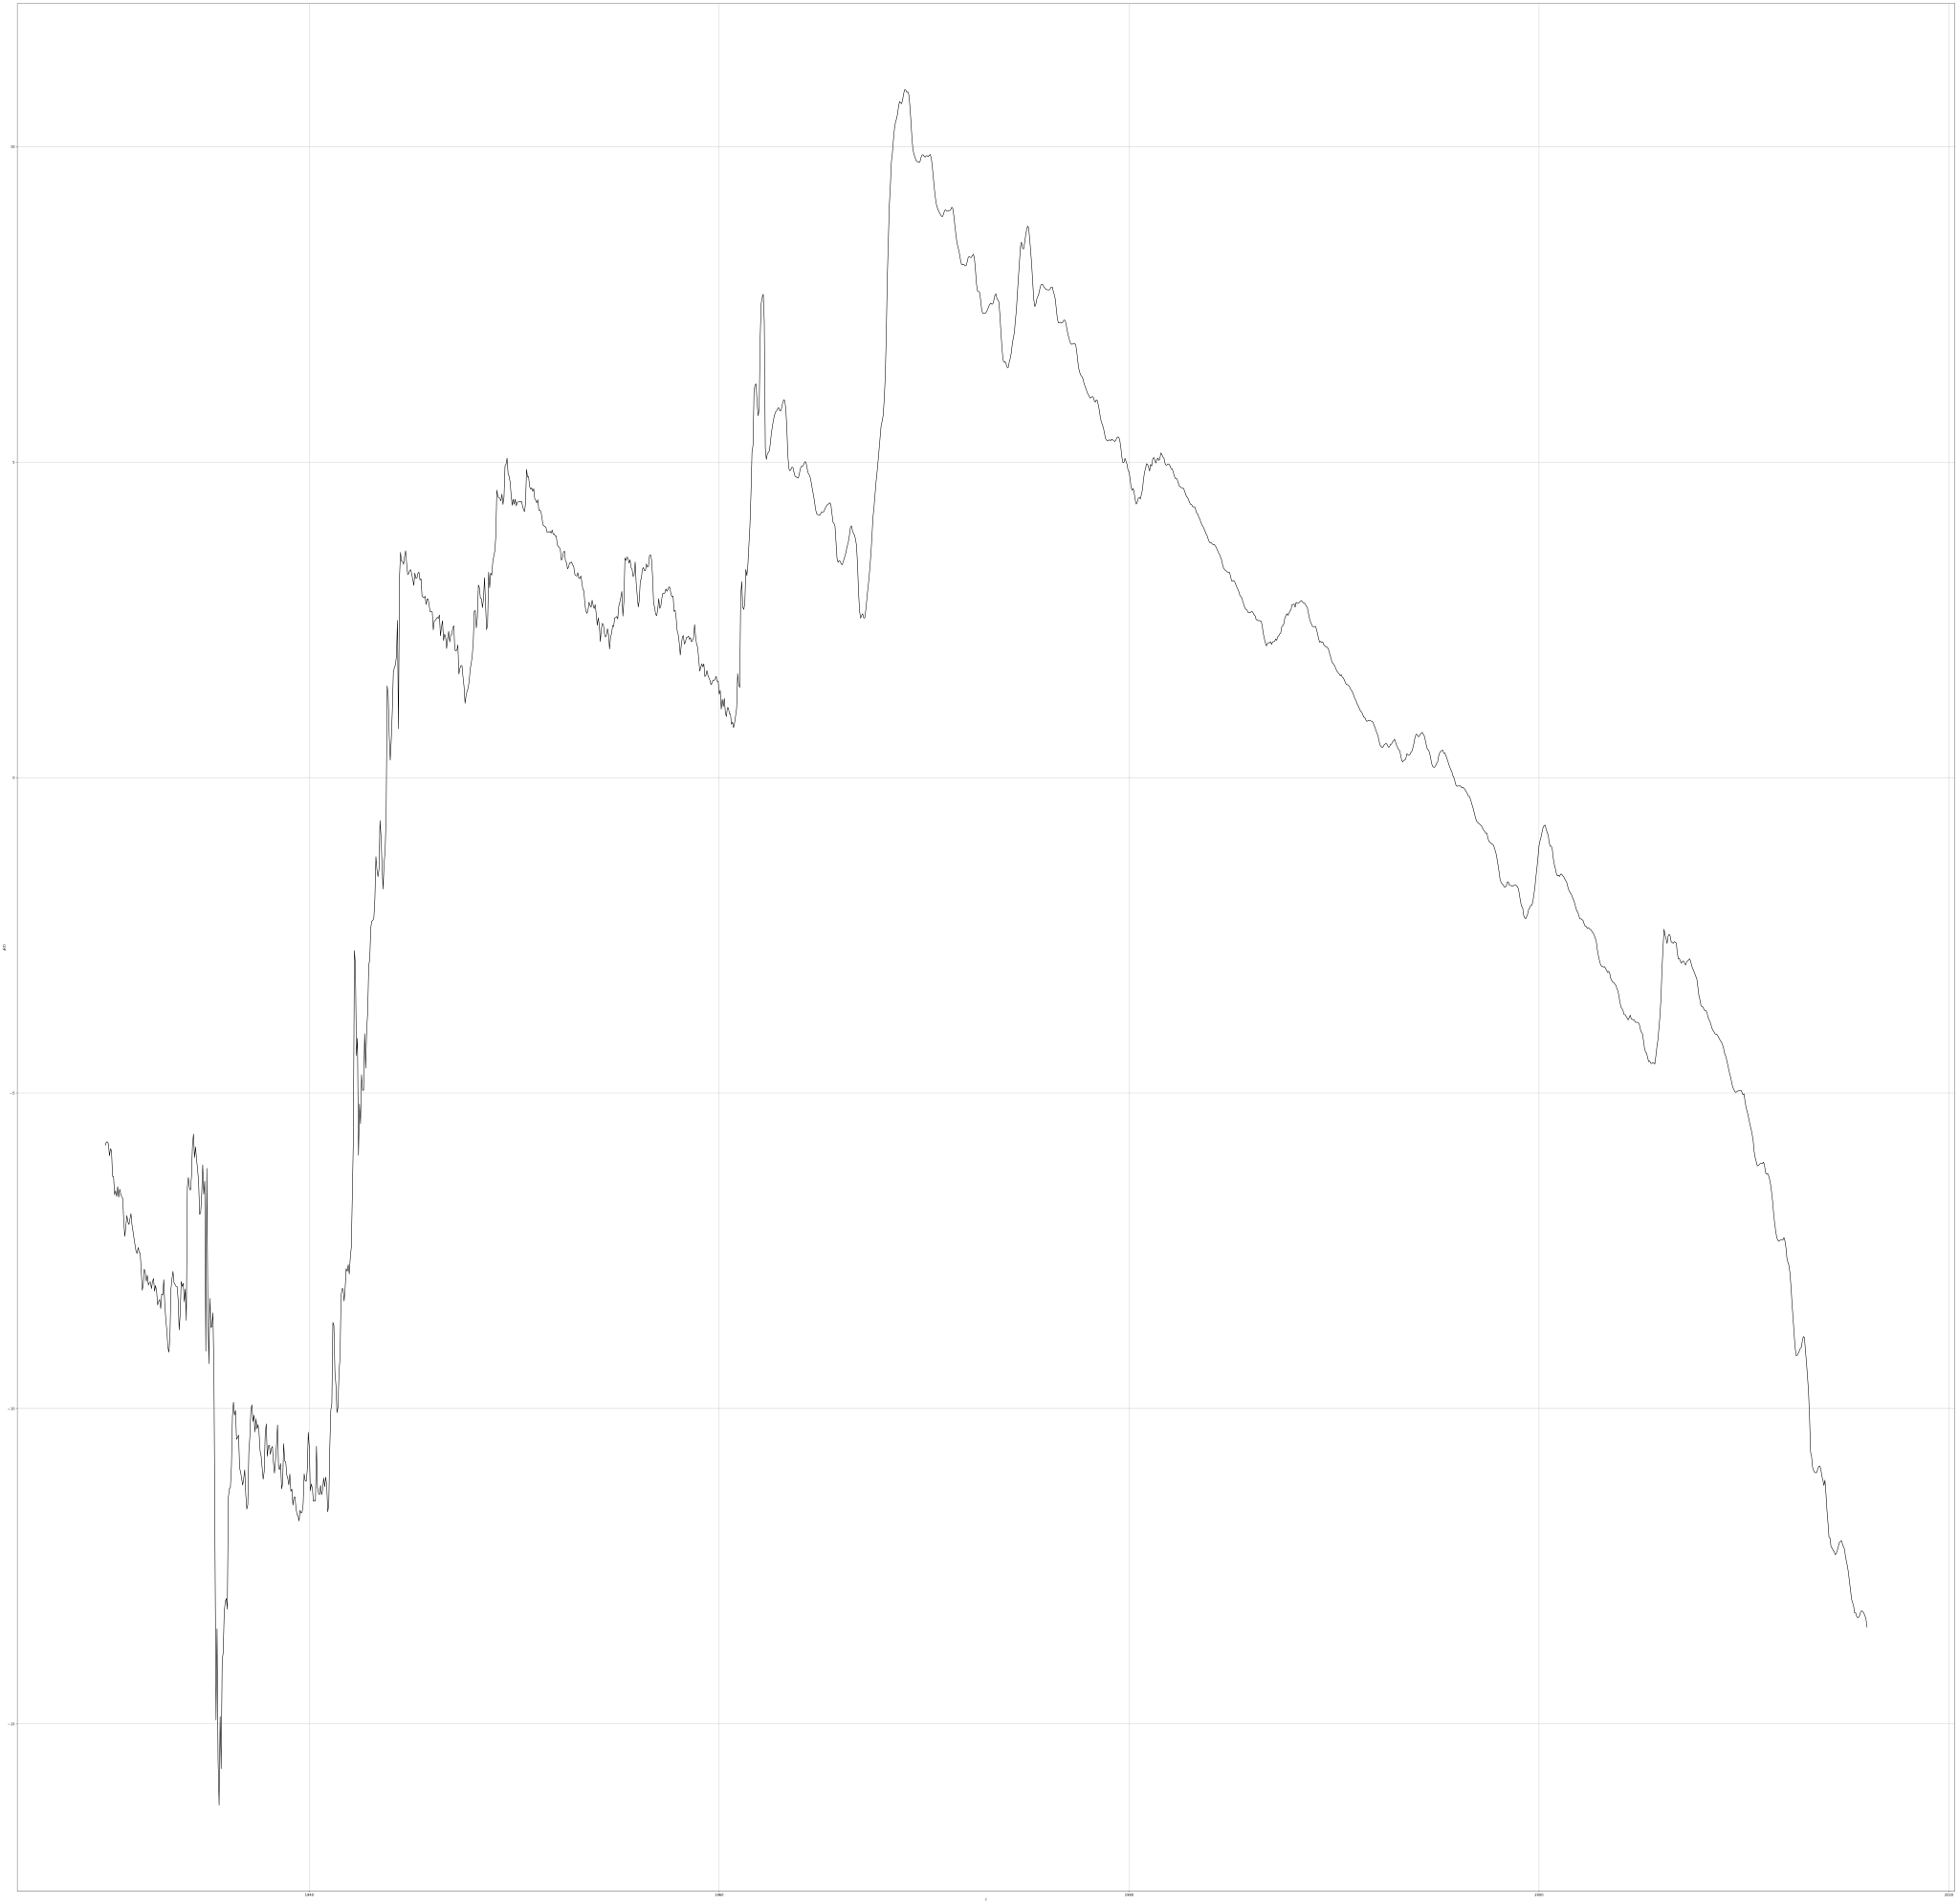

In [45]:
plt.figure(figsize=(100, 100))
plt.grid(True)
plt.ylabel("$\phi(t)$")
plt.xlabel("$t$")
plt.plot(date, detrend_phi, color="black", label="$\phi(t)$")
# plt.legend()
plt.savefig("123.svg", format="svg")
plt.show()